# Feature Engineering - Part C

### 7. [Feature encoding](#feat_enc)
### 7A. [Label Encoding (LE)](#le)
### 7B. [One-Hot Encoding (OHE)](#ohe)
### 8. [Removing highly correlated values](#high_corr)
### 9. [Feature Importance/ Contribution](#feat_imp)

## <a id='feat_enc'>7. Feature Encoding</a>

#### Most of the Machine Learning (ML) algorithms accept `Numerical` data as input. So, it is necessary to convert all Categorical (Text) features into Numerical/ Numbers.

#### There are two ways using which we can transform the Categorical features into Numerical. They are
#### - Label Encoding
#### - One-Hot Encoding

### Label Encoding (LE) (a.k.a. Integer Encoding)
#### Label Encoding is used to transform `Ordinal` features (features that have order) into Numerical. For example, `Small`, `Medium`, `Large`, `Extra Large` etc ... 

#### However, if there are only two unique values in a feature, though they are not `Ordinal` still we can use Label Encoding. For example, `Male` and `Female`.

### One-Hot Encoding (OHE)
#### One-Hot Encoding is used to transform `Nominal` features (features that have NO order) into Numerical. For example, `Toyota`, `Honda`, `Ford`, `Hyundai` etc 

#### OHE produces `Sparse` matrix and increases the shape of the dataframe into many folds. So, when we use OHE, it is very important to analyze the number of classes (unique values) in that feature as they will turn into features.

![sparse](img/sparse.png)

### Load libraries

In [67]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

# Import math
import math

# Import seaborn
import seaborn as sns

### Load the saved csv file, which contains new features

In [68]:
# This CSV file does not contain any missing values
loan_data = pd.read_csv('LoanData_with_new_features.csv')

# Print the shape of the dataframe
print('Shape of the Data', loan_data.shape)

# Print first 5 rows of clean dataframe
loan_data.head()

Shape of the Data (604, 14)


,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,family_count,income_per_person,income_per_person_log
0,LP001002,Male,No,Graduate,No,120.0,360.0,1.0,Urban,Y,8.674026,1,5849.0,8.674026
1,LP001003,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,N,8.714568,2,3045.5,8.021420
2,LP001005,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y,8.006368,1,3000.0,8.006368
3,LP001006,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y,8.505323,1,4941.0,8.505323
4,LP001008,Male,No,Graduate,No,141.0,360.0,1.0,Urban,Y,8.699515,1,6000.0,8.699515


### Remove if there dataframe has index value as well include in it

In [69]:
loan_data.drop('index', axis=1, inplace=True)

KeyError: "['index'] not found in axis"

### List number of unique values in each Categorical feature

In [70]:
# Create a temporary dataframe by dropping Loan_ID as it will have all the values unique because it is an ID feature
loan_data_temp = loan_data.drop("Loan_ID", axis=1)

# From the temporary dataframe extract the columns that are categorical (non-numeric)
loan_data_object_cols = [col for col in loan_data_temp if loan_data[col].dtype == 'object']

# Print unique values from each feature
for col in loan_data_object_cols:
    print(col, loan_data[col].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [71]:
# Alternate Approach
for col in loan_data.drop("Loan_ID", axis=1).select_dtypes(include=[np.object]).columns:
    print(col, loan_data[col].unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


### As there are just two unique values in `Gender`, `Married`, `Education`, and `Self_Employed` features, let us go for `Label Encoding` for these features

## <a id='le'>7A. Label Encoding (LE)</a>

### `Label_Encoding` of feature `Gender`

#### Using `Scikit-Learn` package's `LabelEncoder` class, encode `Gender`

In [72]:
from sklearn.preprocessing import LabelEncoder
labelEncode_Gender = LabelEncoder()

loan_data['Gender_label'] = labelEncode_Gender.fit_transform(loan_data['Gender'])
loan_data.tail()

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,family_count,income_per_person,income_per_person_log,Gender_label
599,LP002978,Female,No,Graduate,No,71.0,360.0,1.0,Rural,Y,7.972466,1,2900.000000,7.972466,0
600,LP002979,Male,Yes,Graduate,No,40.0,180.0,1.0,Rural,Y,8.320205,4,1026.500000,6.933910,1
601,LP002983,Male,Yes,Graduate,No,253.0,360.0,1.0,Urban,Y,9.025456,2,4156.000000,8.332308,1
602,LP002984,Male,Yes,Graduate,No,187.0,360.0,1.0,Urban,Y,8.933664,3,2527.666667,7.835052,1
603,LP002990,Female,No,Graduate,Yes,133.0,360.0,0.0,Semiurban,N,8.430109,1,4583.000000,8.430109,0


#### Combine the classes and number and create a dictionary object
#### This will be very handy when predictions are made on new dataset

In [73]:
gender_dict = dict(zip(labelEncode_Gender.classes_, labelEncode_Gender.transform(labelEncode_Gender.classes_)))
gender_dict

{'Female': 0, 'Male': 1}

#### Finally drop the original feature

In [74]:
loan_data.drop(['Gender'], axis=1, inplace=True)

### `Label_Encoding` of feature `Married`

In [75]:
labelEncode = LabelEncoder()
loan_data['Married_label'] = labelEncode.fit_transform(loan_data['Married'])

married_dict = dict(zip(labelEncode.classes_, labelEncode.transform(labelEncode.classes_)))
print(married_dict)

loan_data.drop(['Married'], axis=1, inplace=True)

{'No': 0, 'Yes': 1}


### `Label_Encoding` of feature `Education`

In [76]:
labelEncode = LabelEncoder()
loan_data['Education_label'] = labelEncode.fit_transform(loan_data['Education'])

education_dict = dict(zip(labelEncode.classes_, labelEncode.transform(labelEncode.classes_)))
print(education_dict)

loan_data.drop(['Education'], axis=1, inplace=True)

{'Graduate': 0, 'Not Graduate': 1}


### `Label_Encoding` of feature `Self_Employed`

In [77]:
labelEncode = LabelEncoder()
loan_data['Self_Employed_label'] = labelEncode.fit_transform(loan_data['Self_Employed'])

self_emp_dict = dict(zip(labelEncode.classes_, labelEncode.transform(labelEncode.classes_)))
print(self_emp_dict)

loan_data.drop(['Self_Employed'], axis=1, inplace=True)

{'No': 0, 'Yes': 1}


### `Encoding` of feature `Loan_Status`
### Remember `Loan_Status` is the "dependent" feature. So, we need NOT `Label Encode` it as this will be predicted by ML model

In [78]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [79]:
loan_data.tail()

,Loan_ID,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,family_count,income_per_person,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label
599,LP002978,71.0,360.0,1.0,Rural,1,7.972466,1,2900.000000,7.972466,0,0,0,0
600,LP002979,40.0,180.0,1.0,Rural,1,8.320205,4,1026.500000,6.933910,1,1,0,0
601,LP002983,253.0,360.0,1.0,Urban,1,9.025456,2,4156.000000,8.332308,1,1,0,0
602,LP002984,187.0,360.0,1.0,Urban,1,8.933664,3,2527.666667,7.835052,1,1,0,0
603,LP002990,133.0,360.0,0.0,Semiurban,0,8.430109,1,4583.000000,8.430109,0,0,0,1


## <a id='ohe'>7B. One-Hot Encoding</a>

### The `Property_Area` has 3 unique values and they can be ordered as 
### `'Rural, Semiurban, and Urban'` or  `'Urban, Semiurban, and Rural'`. So, it is an `Ordinal` feature.

#### This feature can be Label encoded like the previous ones and the final dictionary object will look like,
#### `{'Rural': 0, 'Semiurban': 1, 'Urban': 2}`

### However, we are going to consider this as a `Nominal` feature so that `One-Hot Encoding` can be applied.

### `One-Hot Encoding` of feature `Property_Area`

In [80]:
loan_data = pd.get_dummies(loan_data, prefix_sep="_", columns=['Property_Area'])
loan_data.head()

,Loan_ID,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,family_count,income_per_person,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,120.0,360.0,1.0,1,8.674026,1,5849.0,8.674026,1,0,0,0,0,0,1
1,LP001003,128.0,360.0,1.0,0,8.714568,2,3045.5,8.021420,1,1,0,0,1,0,0
2,LP001005,66.0,360.0,1.0,1,8.006368,1,3000.0,8.006368,1,1,0,1,0,0,1
3,LP001006,120.0,360.0,1.0,1,8.505323,1,4941.0,8.505323,1,1,1,0,0,0,1
4,LP001008,141.0,360.0,1.0,1,8.699515,1,6000.0,8.699515,1,0,0,0,0,0,1


### Let us take a look at the list of features in the dataframe

In [81]:
loan_data.columns

Index(['Loan_ID', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'TotalIncome_log', 'family_count', 'income_per_person',
       'income_per_person_log', 'Gender_label', 'Married_label',
       'Education_label', 'Self_Employed_label', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

### Delete any unwanted features from the dataframe before saving it

In [82]:
loan_data.drop(['income_per_person', 'family_count'], axis=1, inplace=True)

### Save the data in a dataframe before proceeding further

In [83]:
loan_data.to_csv("LoanData_all_numerical.csv", index=False)

# =============================================================
# Going forward, we will use the data from `LoanData_all_numerical.csv` only.
# =============================================================

In [84]:
loan_data = pd.read_csv('LoanData_all_numerical.csv')
print('Shape of the Data', loan_data.shape)
loan_data.head()

Shape of the Data (604, 14)


,Loan_ID,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,120.0,360.0,1.0,1,8.674026,8.674026,1,0,0,0,0,0,1
1,LP001003,128.0,360.0,1.0,0,8.714568,8.021420,1,1,0,0,1,0,0
2,LP001005,66.0,360.0,1.0,1,8.006368,8.006368,1,1,0,1,0,0,1
3,LP001006,120.0,360.0,1.0,1,8.505323,8.505323,1,1,1,0,0,0,1
4,LP001008,141.0,360.0,1.0,1,8.699515,8.699515,1,0,0,0,0,0,1


## <a id='high_corr'>8. Removing highly correlated values</a>

### Get the Correlation matrix from transformed "all numerical" dataframe

In [85]:
loan_data_corr = loan_data.corr()
loan_data_corr

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
LoanAmount,1.000000,0.103208,0.020691,-0.046266,0.671964,0.380041,0.108961,0.138089,-0.166278,0.150838,0.070964,0.006640,-0.075884
Loan_Amount_Term,0.103208,1.000000,-0.011020,-0.021892,-0.015226,0.064179,-0.081326,-0.096569,-0.081212,-0.040194,0.026962,0.057903,-0.086144
Credit_History,0.020691,-0.011020,1.000000,0.549112,0.040232,0.044122,0.012315,0.015899,-0.076019,-0.004605,-0.014075,0.038729,-0.026393
Loan_Status,-0.046266,-0.021892,0.549112,1.000000,0.022591,0.002946,0.013390,0.084936,-0.088569,-0.008270,-0.098794,0.134713,-0.043340
TotalIncome_log,0.671964,-0.015226,0.040232,0.022591,1.000000,0.648976,0.176504,0.160110,-0.197205,0.209654,0.081943,-0.020657,-0.058311
income_per_person_log,0.380041,0.064179,0.044122,0.002946,0.648976,1.000000,-0.010048,-0.160346,-0.183531,0.090298,0.071058,-0.016125,-0.052415
Gender_label,0.108961,-0.081326,0.012315,0.013390,0.176504,-0.010048,1.000000,0.369623,0.047593,-0.001433,0.081687,-0.113797,0.038331
Married_label,0.138089,-0.096569,0.015899,0.084936,0.160110,-0.160346,0.369623,1.000000,0.015138,0.003020,-0.006230,-0.000012,0.006071
Education_label,-0.166278,-0.081212,-0.076019,-0.088569,-0.197205,-0.183531,0.047593,0.015138,1.000000,-0.011345,0.074378,-0.039461,-0.031494
Self_Employed_label,0.150838,-0.040194,-0.004605,-0.008270,0.209654,0.090298,-0.001433,0.003020,-0.011345,1.000000,0.022690,0.002901,-0.025068


### Get the absolute value of correlation matrix 

In [86]:
loan_data_corr = loan_data.corr().abs()
loan_data_corr

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
LoanAmount,1.000000,0.103208,0.020691,0.046266,0.671964,0.380041,0.108961,0.138089,0.166278,0.150838,0.070964,0.006640,0.075884
Loan_Amount_Term,0.103208,1.000000,0.011020,0.021892,0.015226,0.064179,0.081326,0.096569,0.081212,0.040194,0.026962,0.057903,0.086144
Credit_History,0.020691,0.011020,1.000000,0.549112,0.040232,0.044122,0.012315,0.015899,0.076019,0.004605,0.014075,0.038729,0.026393
Loan_Status,0.046266,0.021892,0.549112,1.000000,0.022591,0.002946,0.013390,0.084936,0.088569,0.008270,0.098794,0.134713,0.043340
TotalIncome_log,0.671964,0.015226,0.040232,0.022591,1.000000,0.648976,0.176504,0.160110,0.197205,0.209654,0.081943,0.020657,0.058311
income_per_person_log,0.380041,0.064179,0.044122,0.002946,0.648976,1.000000,0.010048,0.160346,0.183531,0.090298,0.071058,0.016125,0.052415
Gender_label,0.108961,0.081326,0.012315,0.013390,0.176504,0.010048,1.000000,0.369623,0.047593,0.001433,0.081687,0.113797,0.038331
Married_label,0.138089,0.096569,0.015899,0.084936,0.160110,0.160346,0.369623,1.000000,0.015138,0.003020,0.006230,0.000012,0.006071
Education_label,0.166278,0.081212,0.076019,0.088569,0.197205,0.183531,0.047593,0.015138,1.000000,0.011345,0.074378,0.039461,0.031494
Self_Employed_label,0.150838,0.040194,0.004605,0.008270,0.209654,0.090298,0.001433,0.003020,0.011345,1.000000,0.022690,0.002901,0.025068


### Construct an unit matrix to the shape of correlation matrix 

In [87]:
np.ones(loan_data_corr.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

###  Keep the lower diagonal triangle to 1 and others to 0

In [88]:
np.tril(np.ones(loan_data_corr.shape), k=-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

### Convert the resultant matrix to boolean 

In [89]:
np.tril(np.ones(loan_data_corr.shape), k=-1).astype(np.bool)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False],
       [ True,  True,  True,

### Coerce the Correlation matrix to the above resultant matrix 

In [90]:
loan_data_corr.where(np.tril(np.ones(loan_data_corr.shape), k=-1).astype(np.bool), inplace=True)
loan_data_corr

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
LoanAmount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_Amount_Term,0.103208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,0.020691,0.011020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_Status,0.046266,0.021892,0.549112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalIncome_log,0.671964,0.015226,0.040232,0.022591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_per_person_log,0.380041,0.064179,0.044122,0.002946,0.648976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_label,0.108961,0.081326,0.012315,0.013390,0.176504,0.010048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married_label,0.138089,0.096569,0.015899,0.084936,0.160110,0.160346,0.369623,NaN,NaN,NaN,NaN,NaN,NaN
Education_label,0.166278,0.081212,0.076019,0.088569,0.197205,0.183531,0.047593,0.015138,NaN,NaN,NaN,NaN,NaN
Self_Employed_label,0.150838,0.040194,0.004605,0.008270,0.209654,0.090298,0.001433,0.003020,0.011345,NaN,NaN,NaN,NaN


### Set Correlation threshold above which the features have to be deleted from dataframe 

In [91]:
CORR_THRESHOLD = 0.67  # Usual range: 90 to 95% (0.90 to 0.95)

loan_data_corr > CORR_THRESHOLD

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
LoanAmount,False,False,False,False,False,False,False,False,False,False,False,False,False
Loan_Amount_Term,False,False,False,False,False,False,False,False,False,False,False,False,False
Credit_History,False,False,False,False,False,False,False,False,False,False,False,False,False
Loan_Status,False,False,False,False,False,False,False,False,False,False,False,False,False
TotalIncome_log,True,False,False,False,False,False,False,False,False,False,False,False,False
income_per_person_log,False,False,False,False,False,False,False,False,False,False,False,False,False
Gender_label,False,False,False,False,False,False,False,False,False,False,False,False,False
Married_label,False,False,False,False,False,False,False,False,False,False,False,False,False
Education_label,False,False,False,False,False,False,False,False,False,False,False,False,False
Self_Employed_label,False,False,False,False,False,False,False,False,False,False,False,False,False


### Extract features that are correlated above the threshold 

In [92]:
corr_drop_columns = [col for col in loan_data_corr if any(loan_data_corr[col] > CORR_THRESHOLD)]
corr_drop_columns

['LoanAmount']

In [65]:
loan_data.drop(corr_drop_columns, axis=1, inplace=True)
loan_data.columns

Index(['Loan_ID', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'income_per_person_log', 'Gender_label',
       'Married_label', 'Education_label', 'Self_Employed_label',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Save the data in a dataframe before proceeding further

In [93]:
loan_data.to_csv("LoanData_clean.csv", index=False)

# =============================================================
# Going forward, we will be using the data from `LoanData_clean.csv` only.
# =============================================================

In [94]:
loan_data = pd.read_csv('LoanData_clean.csv')
print('Shape of the Data', loan_data.shape)
loan_data.head()

Shape of the Data (604, 14)


,Loan_ID,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,120.0,360.0,1.0,1,8.674026,8.674026,1,0,0,0,0,0,1
1,LP001003,128.0,360.0,1.0,0,8.714568,8.021420,1,1,0,0,1,0,0
2,LP001005,66.0,360.0,1.0,1,8.006368,8.006368,1,1,0,1,0,0,1
3,LP001006,120.0,360.0,1.0,1,8.505323,8.505323,1,1,1,0,0,0,1
4,LP001008,141.0,360.0,1.0,1,8.699515,8.699515,1,0,0,0,0,0,1


##  <a id='feat_imp'>9. Feature Importance/ Contribution</a>

In [98]:
# Import Random Forest Classifier library.
# This is the same library that will be used for generating Machine learning Model as well.
from sklearn.ensemble import RandomForestClassifier 

In [99]:
# Separate the Dependent feature from dataset
y = loan_data.Loan_Status

In [100]:
# Remove the ID feature. Usually the ID feature is an unique identifier assigned for each observation.
# This ID feature will not influence or contribute in determining the outcome.

# Remove the Dependent feature as well since it is already extracted from the dataset
loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1, inplace=True)

In [103]:
# Visualize the data to see if everything is alright
loan_data.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,120.0,360.0,1.0,8.674026,8.674026,1,0,0,0,0,0,1
1,128.0,360.0,1.0,8.714568,8.021420,1,1,0,0,1,0,0
2,66.0,360.0,1.0,8.006368,8.006368,1,1,0,1,0,0,1
3,120.0,360.0,1.0,8.505323,8.505323,1,1,1,0,0,0,1
4,141.0,360.0,1.0,8.699515,8.699515,1,0,0,0,0,0,1


In [104]:
# Instantiate Random Forest Classifier algorithm
rf = RandomForestClassifier()

# Fit the data into Random Forest Classifier algorithm. 
# In other words, it generates Random Forest MACHINE LEARNING MODEL
rf.fit(loan_data, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Extract the feature importance from algorithm, rearrange, and visualize it

In [107]:
# Extract the feature importance computed by the algorithm and its corresponding feature names, and store it in a dataframe.
# Sort them in Descending order and the tabulate it
feature_importances = pd.DataFrame({'features' : loan_data.columns, 
                                    'importance' : rf.feature_importances_} ).sort_values('importance', ascending=False)
feature_importances

,features,importance
2,Credit_History,0.258603
4,income_per_person_log,0.192966
3,TotalIncome_log,0.187179
0,LoanAmount,0.181844
1,Loan_Amount_Term,0.054295
6,Married_label,0.027000
7,Education_label,0.021008
10,Property_Area_Semiurban,0.020491
8,Self_Employed_label,0.018601
9,Property_Area_Rural,0.015139


### Generate a bar-chart to visualize the importance in  a better way

<BarContainer object of 12 artists>

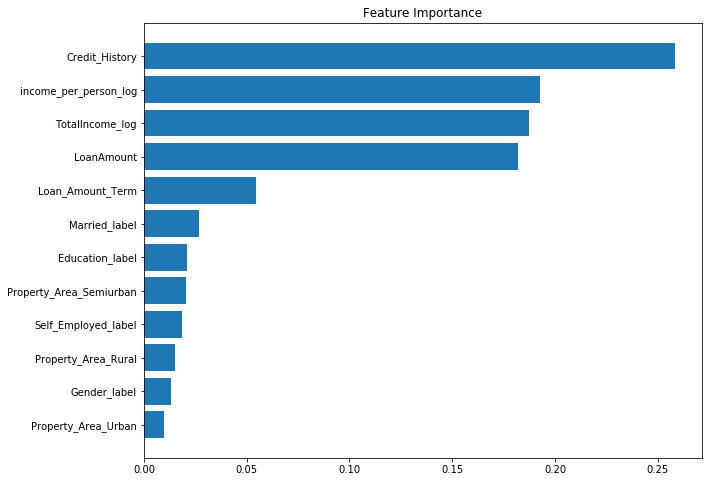

In [108]:
# Resort the feature importance dataframe to our convenience so that it gets plotted with maximum value first.
feature_importances.sort_values('importance', ascending=True, inplace=True)

# Set the Plot size (width, height)
plt.figure(figsize=(10,8))

# Set the title of the plot
plt.title("Feature Importance")

# Plot and show immediately
plt.barh(range(feature_importances.shape[0]), feature_importances['importance'], 
         height = 0.8, tick_label=feature_importances['features'] )

From the above chart, it is evident that **the first four features (out of 13) alone** (`Credit_History, TotalIncome_log, income_per_person_log`, and `LoanAmount`) contribute around 80% to determine the dependent variable's outcome.



#### Homework: What is the total percentage of contribution of `Gender` and `Married` labels together?

### Usually the features that are  less important (say < 0.2% [importance=0.02]) are removed from the dataframe before generating the ML models

In [109]:
# Set the importance threshold
IMPORTANCE_THRESHOLD = 0.015

# Select the features that are less than the pre-determined threshold so that they can be removed from the dataframe
less_imp_features = feature_importances[feature_importances['importance'] < IMPORTANCE_THRESHOLD].features
less_imp_features

11    Property_Area_Urban
5            Gender_label
Name: features, dtype: object

In [110]:
loan_data.drop(less_imp_features, axis=1, inplace=True)

In [111]:
loan_data.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log,income_per_person_log,Married_label,Education_label,Self_Employed_label,Property_Area_Rural,Property_Area_Semiurban
0,120.0,360.0,1.0,8.674026,8.674026,0,0,0,0,0
1,128.0,360.0,1.0,8.714568,8.021420,1,0,0,1,0
2,66.0,360.0,1.0,8.006368,8.006368,1,0,1,0,0
3,120.0,360.0,1.0,8.505323,8.505323,1,1,0,0,0
4,141.0,360.0,1.0,8.699515,8.699515,0,0,0,0,0


### Save the final data in a dataframe before proceeding further

In [112]:
# Add the target variable back to the dataframe
loan_data['Loan_Status'] = y

# Save the dataframe
loan_data.to_csv("LoanData_final.csv", index=False)

# =============================================================
# This is the final data that will be used for ML Model generation 
# `LoanData_final.csv`.
# =============================================================